# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 Having an effective recommendation system is key to the growth of Internet-based companies like Spotify. It helps navigate the challenge of keeping users engaged, thus justifying users' decisions to maintain their subscriptions, which in turn ensures consistent revenue for the company.

### **The objective:**

 - What is the intended goal?

To provide an elite user experience by developing a system that accurately personalizes 10 predictions of songs a user is most likely to listen to.

### **The key questions:**

- What are the key questions that need to be answered?

(How can we measure the accuracy of our song predictions?)

(In What ways can we personalize recommendations for users with limited listening history?)

(How quickly should our system adapt to changes in a user's listening habits?)

(How can we build a system that can handle recommendations for a large user base,
while ensuring efficient processing of vast amounts of song and user data?)

(what approaches can we use to explain our recommendations to users in a way that increases trust and engagement?)


### **The problem formulation**:

- What is it that we are trying to solve using data science?

Using data and algorithms to solve the complex matching problem between users and a vast library of content. This involves generating insights on user engagement and retention, impacting the company's bottom line through product recommendations, and identifying meaningful patterns in user behavior



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# Display the first 10 records of count_df
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display the first 10 records of song_df
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# Display the info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display the info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**


*   with each dataset over 1 million rows, these are substantial dataset
*   count_df represents good user-song interaction, with the columns user_id, song_id, play_count

*   song_df represents metadata that contains information about songs, their ID's, titles, release information, artists, and release years.



*   titles has 0.0017% missing values and releases has 0.0007% missing values









In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

Yes, they may be encoded to numeric featues since they are categorical variables. label would be a good option because each unique encrypted value gets a unique integer, maintaining a one-to-one relationship.

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
# Label encoding code
le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

For the goal of accurately predicting 10 songs a user is likely to listen to, filtering out users with few interactions or rarely-played songs isn't strictly required but could be beneficial. The decision hinges on balancing data quality, user experience, computational efficiency, and behavior analysis.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df[df['play_count'] <= 5]

In [ ]:
# Check the shape of the data
df_final.shape

(400730, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3156

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

9998

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

3374

#### **Observations and Insights:__________**

With 400,730 rows and 7 columns there is a great amount of data still left to work with. 3,156 unique users means good amount of differnt user patterns to anaylze. 9,998 unique songs provide a great amount to recommend. a great catalog of 3,374 different Artists.

*   On average, each user has interacted with about 127 songs (400,730 / 3,156)
*   there are about 3 songs per artist (9,998 / 3,374)







### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
most_interacted_songs = df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False).head(10)
print(most_interacted_songs)

song_id
352     1634
2220    1583
8582    1463
5531    1427
4448    1291
4152    1259
1334    1208
1118    1203
8092    1126
6189    1067
Name: play_count, dtype: int64


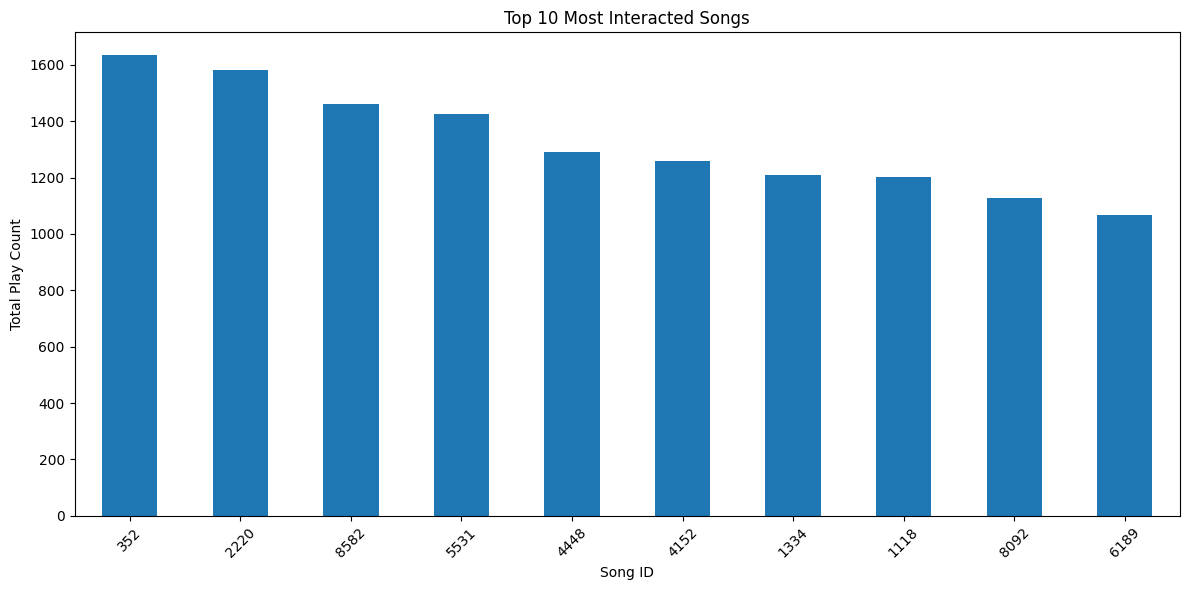

In [ ]:
plt.figure(figsize=(12, 6))
most_interacted_songs.plot(kind='bar')
plt.title('Top 10 Most Interacted Songs')
plt.xlabel('Song ID')
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most interacted users

In [ ]:
most_active_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)
print(most_active_users)

user_id
32542    1157
75144    1032
31704     981
10807     903
7834      896
6480      874
52662     835
23297     813
48273     800
20619     732
Name: play_count, dtype: int64


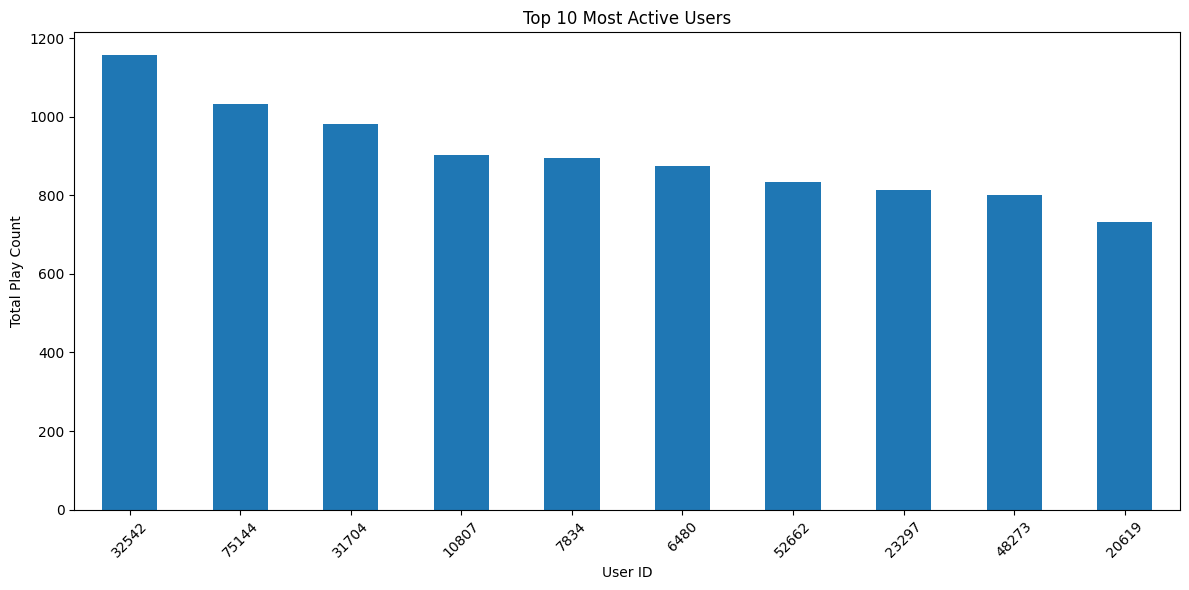

In [ ]:
plt.figure(figsize=(12, 6))
most_active_users.plot(kind='bar')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Observations and Insights:_______**

With the top 10 most played songs, there seems to be a relatively even distribution of popularity among them. While in the top 10 users, the top 3 appear to be power users. This raises an interesting question: what drives these users' need for such high app engagement?

We should invest more research into understanding what makes these songs so popular, as this information could greatly inform our content curation and recommendation strategies. Overall, the data shows a good range, with no extreme outliers, which suggests a healthy distribution of engagement across both songs and users, within the top 10.

Songs released on yearly basis

In [ ]:
# count of the songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


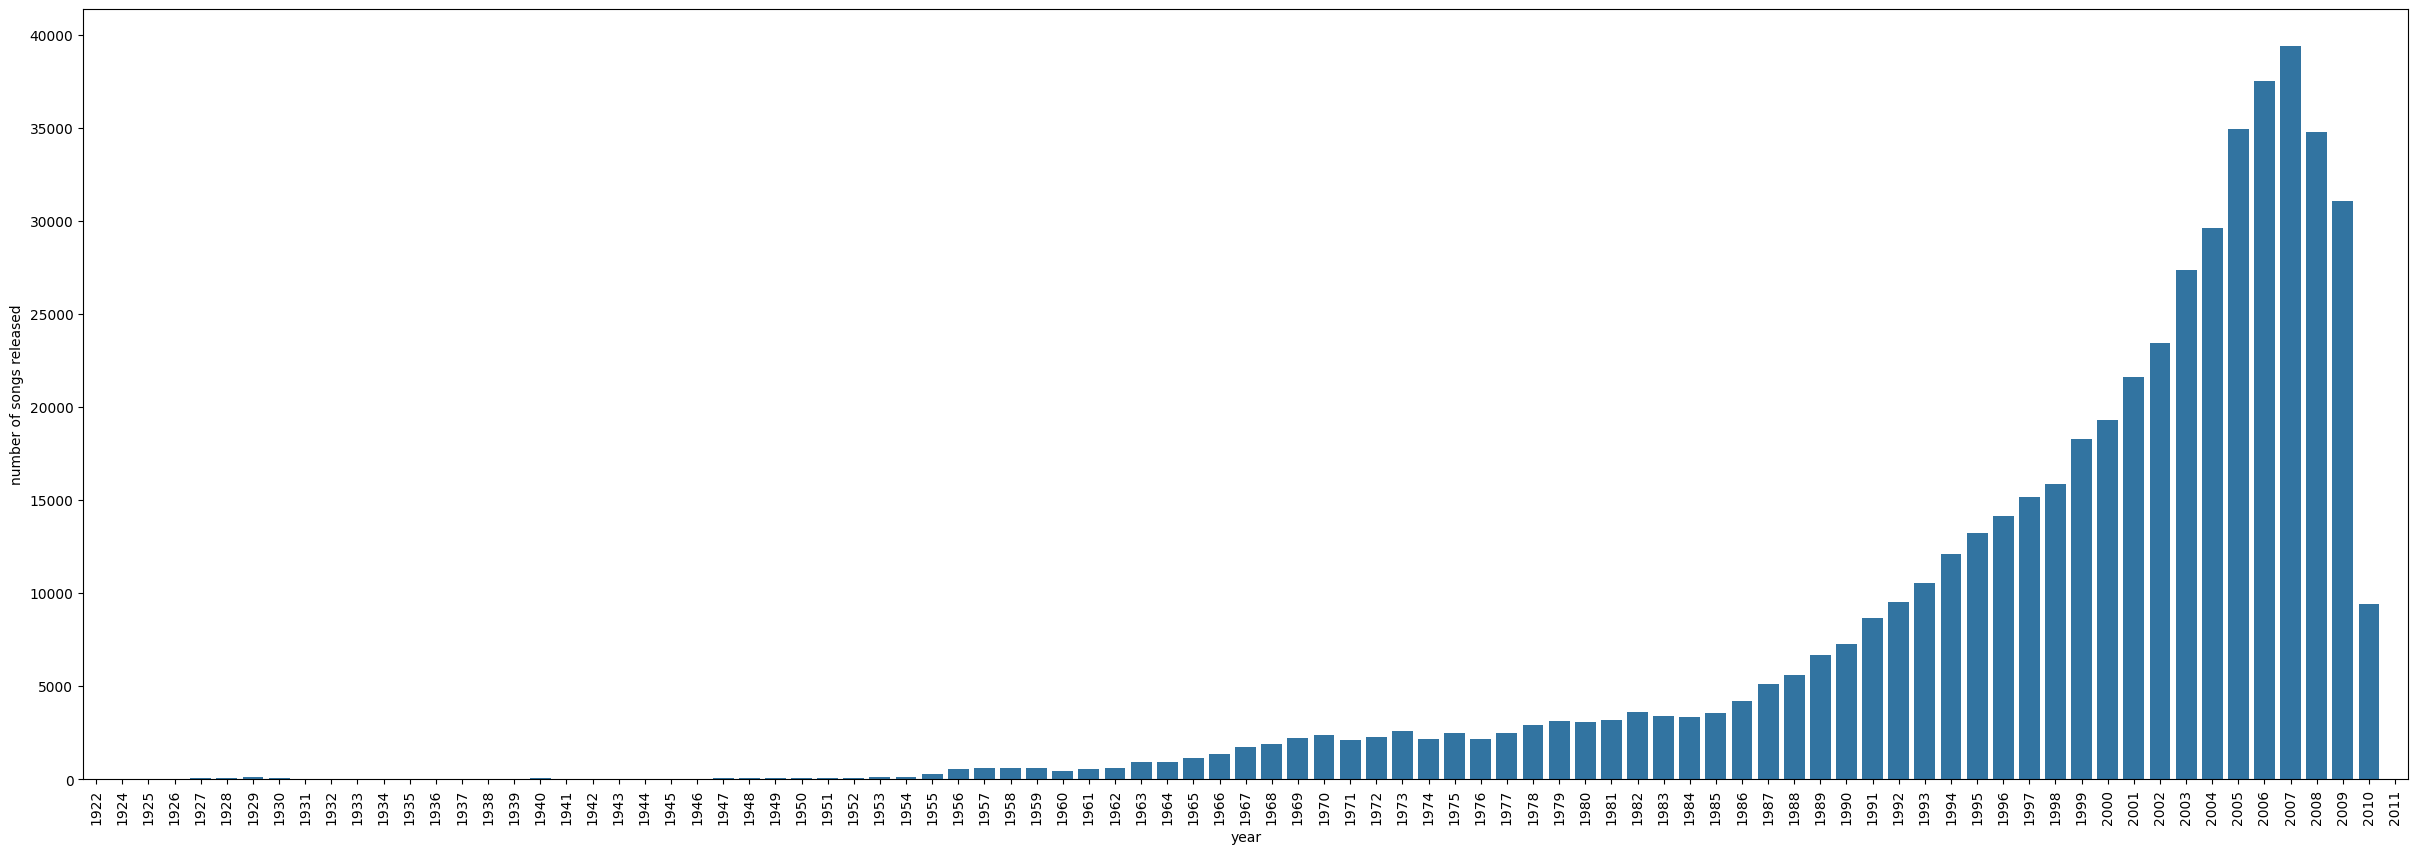

In [ ]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

#### **Observations and Insights:__________** #

Since 1990, there has been an explosion of music content available to the mass population. The number of annual releases has increased dramatically from around 8,000 to approximately 38,000 increasing each year over a 20-year period. With such a vast amount of entertainment being released in just two decades, it indeed brings into question the overall quality of this music. This massive increase in available content underscores why a robust recommendation system is crucial in today's music landscape.

**Think About It:** What other insights can be drawn using exploratory data analysis?

We hope to analyze trends of song popularity over time to find out shifting music preferences. Even Correlation between release year and play count to understand the impact of recency on popularity. We want to look at how song popularity changes over time to see how people's music tastes are changing.

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?



*   Noticed user engagement levels and the small group of power users
*   the relative even distribution of popularity among top 10 songs


*   Content quantity vs. quality, shows the need for effective recommendation systems







Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()      # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()        # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
0,1.000000,11
1,1.673913,46
2,2.000000,7
3,2.416667,12
4,1.458333,48


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def get_top_n_songs(n=10, min_play_freq=5):

  # Filter songs based on minimum play frequency
  qualified_songs = final_play[final_play['play_freq'] >= min_play_freq]

  # sort by average play count and select top n
  top_songs = qualified_songs.sort_values('avg_count', ascending=False).head(n)

  return top_songs

In [ ]:
# Recommend top 10 songs using the function defined above

top_10_songs = get_top_n_songs(10, 5)
print(top_10_songs)

         avg_count  play_freq
song_id                      
7485      3.900000         10
3838      3.818182         11
3195      3.800000          5
725       3.545455         11
9706      3.500000          6
3987      3.500000         12
1778      3.444444          9
3277      3.428571          7
1322      3.400000          5
1226      3.400000         15


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357295 sha256=0bd74ff8cd6a84830b826c945cd10f977259158b08947abbbe9ab67469d78452
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

Recommendation systems for music should ideally balance historical preferences with recent user behavior. With F1_score@k harmonic mean we can focus on the top recommendations that should be a balance of Precision@k: recommeneded items that are relevant and Recall@k: relevant items that are recommended.

In [ ]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Precision is affected by what is actually relevant. An increase in the threshold will focus the recommendations. With recall, an increase will make it harder for the system to catch the user's likes, while a decrease would introduce more chances of false positives. The threshold being at 1.5 is understandable because a too precise system might become a filter bubble. Being at 1.5 leaves room for play counts to have diversity.

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[["user_id", "song_id", "play_count",]], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

Changing the test size would affect the model's performance in several ways. Reducing the test size might not give a reliable estimate of generalization because it can lead to higher variance in results. Conversely, a larger test set helps in detecting overfitting, as it provides a more robust evaluation of how well the model performs on unseen data.

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1375
Precision:  0.417
Recall:  0.585
F_1 score:  0.487


**Observations and Insights:_________**



*   pearson:
RMSE: 1.1854
Precision:  0.395
Recall:  0.621
F_1 score:  0.483

*   cosine:
RMSE: 1.0964
Precision:  0.388
Recall:  0.597
F_1 score:  0.47

*   msd:
RMSE: 1.0858
Precision:  0.405
Recall:  0.55
F_1 score:  0.466

*   pearson_baseline:
RMSE: 1.1375
Precision:  0.417
Recall:  0.585
F_1 score:  0.487

Pearson Baseline emerged as the most balanced similarity measure, with the highest F1 score (0.487) and precision (0.417). Mean Squared Difference (MSD) best predicted exact play_counts (RMSE: 1.0858), while Pearson correlation excelled at finding relevant songs (recall: 0.621). This suggests a trade-off between accurately predicting play_counts and identifying relevant music recommendations. For our system, Pearson Baseline offers the best overall performance, balancing precision and recall.





In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.15   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1458306071458928, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.86   {'actual_k': 12, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.8607083703797433, details={'actual_k': 12, 'was_impossible': False})

**Observations and Insights:_________**

The underestimation for a listened song does show that the model can be fine-tuned a bit more. With the non-listened song estimation being above the threshold moderately, it's okay recommending the song but not in the top 10. Both the estimates are close to 1.5, so we need to fine-tune for a more memorable user experience.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, joblib_verbose=0)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
best_rmse = gs.best_score['rmse']

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

print("Best RMSE score:", gs.best_score['rmse'])
print("Best parameters:", gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [ ]:
# Train the best model found in above gridsearch
best_model = gs.best_estimator['rmse']

# Print the best model's parameters
print("\nBest model details:")
print(f"- Similarity metric: {best_model.sim_options['name']}")
print(f"- User-based: {best_model.sim_options['user_based']}")
print(f"- k: {best_model.k}")
print(f"- min_k: {best_model.min_k}")
print(f"- min_support: {best_model.sim_options['min_support']}")


Best model details:
- Similarity metric: pearson_baseline
- User-based: True
- k: 30
- min_k: 9
- min_support: 2


**Observations and Insights:_________**



*   The best prediction accuracy (RMSE) is 1.0533, pearson_baseline similarity metric out performs the others.
*   At least 9 neighbors are needed to make a prediction, The model performs best when considering 30 neighbors for making predictions.

*   only users who have rated at least 2 common items are considered for similarity calculation.

The model has a balanced tuning using sufficient data for reliable predictions while still maintaining relevance to the target user.




In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
prediction = sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.15   {'actual_k': 30, 'was_impossible': False}


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
prediction = sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.86   {'actual_k': 12, 'was_impossible': False}


**Observations and Insights:______________**

Our optimization efforts did not yield a significant improvement in model performence. The optimized model's metrics are nearly identical to those of the baseline model.



**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

The model we've been using is user-based, so to song we need to switch to item based which can be done by adjusting the user-based parameter and using the get_neighbors method.

In [ ]:
# Use inner id 0

sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}
sim_item_item = KNNBasic(k=30, min_k=9, sim_options=sim_options)
sim_item_item.fit(trainset)

# Find the 5 most similar items to the item with inner id 0
sim_item_item.get_neighbors(0, 5)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[2295, 265, 3014, 129, 3444]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(data=df_final, user_id=6958, top_n=5, algo=sim_user_user_optimized)

NameError: name 'sim_user_user_optimized' is not defined

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,498,3.253887
1,3271,2.990336
2,8462,2.901514
3,6478,2.742740
4,5167,2.621877


**Observations and Insights:______________**

All songs are predicted to be played more than twice with a narrow range, indicating a good potential for user engagement.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

I believe the intuition behind subtracting 1/np.sqrt(n) is beacause it helps to conteract the popularity bias (filter bubbles or echo chambers), very popular items tend to be recommended more often. If we where to add the effects would be reversed.

In [ ]:
# Applying the ranking_songs function on the final_play data
ranked_recommendations = ranking_songs(recommendations, final_play)

print(ranked_recommendations)

   song_id  play_freq  predicted_play_count  corrected_play_count
0      498        143              3.253887              3.170263
2     3271        102              2.990336              2.891322
3     8462         60              2.901514              2.772414
1     6478        122              2.742740              2.652204
4     5167         49              2.621877              2.479020


**Observations and Insights:______________**

After correction the order hasn't changed, the popular songs are still favored. Only difference is the range for the play count narrowed.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

sim_options = {'name': 'pearson_baseline', 'user_based': False}
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1)

sim_item_item.fit(trainset)

precision_recall_at_k(sim_item_item)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0657
Precision:  0.436
Recall:  0.554
F_1 score:  0.488


In [ ]:
print(predictions_df)

**Observations and Insights:______________**

*   The item-item model has lower rmse, higher precisio and F1-score
*   The item-item model seems to make more accurate predictions overall with lower rmse, and has a slighty better balance of precision and recall.



In [ ]:
# Predicting play_count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
predicition = sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.00   {'actual_k': 19, 'was_impossible': False}


In [ ]:
# Predict the play_count for a user that has not listened to the song (with song_id 1671)

users_listened_1671 = set(df_final[df_final['song_id'] == 1671]['user_id'])

all_users = set(df_final['user_id'])

users_not_listened_1671 = all_users - users_listened_1671

print(list(users_not_listened_1671)[:5])


[8194, 49157, 32773, 8199, 40969]


In [ ]:
prediction = sim_item_item.predict(8194, 1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.61   {'actual_k': 9, 'was_impossible': False}


**Observations and Insights:______________**

the item-item model adapts well to both known and cold start cases. its conservative for known interactions but more optimistic for new ones, potentially encouraging exploration.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
best_rmse = gs.best_score['rmse']

# Extract the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

print("Best RMSE score:", gs.best_score['rmse'])
print("Best parameters:", gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search

best_params = {
    'k': 30,
    'min_k': 6,
    'sim_options':{
        'name': 'pearson_baseline',
        'user_based': False,
        'min_support': 2
        }}

sim_item_item_optimized = KNNBasic(**best_params)

sim_item_item_optimized.fit(trainset)

precision_recall_at_k(sim_item_item_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0290
Precision:  0.411
Recall:  0.629
F_1 score:  0.497


**Observations and Insights:______________**

The optimized item-item similarity model (sim_item_item_optimized) performs better than the baseline model (sim_item_item) on most metrics:

*   Lower RMSE: 1.0290 vs 1.0657
*   Higher Recall: 0.629 vs 0.554
*   Higher F1 score: 0.497 vs 0.488


The optimized model improved recall at the cost of some precision, suggesting its recommending more relevant items.




In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
prediction = sim_item_item_optimized.predict(6958, 1671, verbose=True)

user: 6958       item: 1671       r_ui = None   est = 1.00   {'actual_k': 19, 'was_impossible': False}


In [ ]:
# Predicting play_count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
prediction = sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.00   {'actual_k': 14, 'was_impossible': False}


**Observations and Insights:______________**

Both the optimized and baseline models predict a play count of 1.00 for user 6958 and song 1671. This consistency suggests that the optimization didn't significantly change the prediciton for this user-item pair.

In [ ]:
# Find five most similar items to the item with inner id 0
similar_items = sim_item_item_optimized.get_neighbors(0, 5)

print("Inner ids of the 5 most similar items to item 0:")
print(similar_items)

Inner ids of the 5 most similar items to item 0:
[2295, 265, 3014, 129, 3444]


In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, user_id=6958, top_n=5, algo=sim_item_item_optimized)
print(recommendations)

[(4619, 2.7440185624065627), (3465, 2.6095319872718217), (3578, 2.605500951017438), (7682, 2.51301604738344), (1669, 2.4541839724272676)]


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,4619,2.744019
1,3465,2.609532
2,3578,2.605501
3,7682,2.513016
4,1669,2.454184


In [ ]:
# Applying the ranking_songs function
ranked_recommendations = ranking_songs(recommendations, final_play)

print(ranked_recommendations)

   song_id  play_freq  predicted_play_count  corrected_play_count
4     4619         32              2.744019              2.567242
2     3465         63              2.609532              2.483544
1     3578         65              2.605501              2.481466
0     7682        142              2.513016              2.429098
3     1669         48              2.454184              2.309846


**Observations and Insights:_________**



*   The ranking system has effectively reordered the recommendations, as the order of songs differs from their predicted play counts.
*   Song 7682 has the highest play frequency (142) but ranks 4th in the final list. This indicates the system is balancing popularity with personalized predictions.
*   The correction factor has had a more significant impact on songs with lower play frequencies. For example, song 4619 (play_freq 32) had its score reduced by about 0.18, while song 7682 (play_freq 142) only saw a reduction of about 0.08.

*   the recommedation system is working as intended, balancing personalized
predicitions with overall popualarity to provide a diverse set of recommendations.





### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd_algo = SVD(random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
svd_algo.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(svd_algo)

RMSE: 1.0338
Precision:  0.402
Recall:  0.533
F_1 score:  0.458


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
prediction = svd_algo.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.07   {'was_impossible': False}


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
prediction = svd_algo.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.17   {'was_impossible': False}


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fitting data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score['rmse']

# Extract the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

# Combination of parameters that gave the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])
print("Best parameters:", gs.best_params['rmse'])

Best RMSE score: 1.0193772952575506
Best parameters: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

the more parameters and values the more the computation time increses, with this we consider the trade-off between model complexity and performance. yes, we can try separate learning rates and regularization. This allows fine-tuning of the models learned user preferences, giving the model flexibility in how it learns and regularizes for top 10 recommendations. While n_factors represent the dimensionality that can help capture more complex relationships between users and songs.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_algo_optimized = SVD(n_epochs = 10, lr_all = 0.005, reg_all = 0.2,n_factors=100, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
svd_algo_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd_algo_optimized)

RMSE: 1.0224
Precision:  0.405
Recall:  0.55
F_1 score:  0.466


**Observations and Insights:_________**

The optimization led to improvements across all metrics, with a boost in recall. Showing the model is better at capturing a wider range of relevant songs for users

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
prediction = svd_algo_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.22   {'was_impossible': False}


In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
prediction = svd_algo_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


**Observations and Insights:_________**

The model seems to be conservative in its predictions, underestimating rather than overestimating in this case. We might consider adjusting the learning rate or regularization parameters to allow for more extreme predictions if this underestimation is consistent across many users.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, user_id=6958, top_n=5, algo=svd_algo_optimized)

pd.DataFrame(recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,7224,2.627384
1,8324,2.258954
2,6574,2.212654
3,9050,2.178473
4,5797,2.177542


In [ ]:
# Ranking songs based on above recommendations
ranked_recommendations = ranking_songs(recommendations, final_play)

print(ranked_recommendations)

   song_id  play_freq  predicted_play_count  corrected_play_count
0     7224        107              2.627384              2.530710
1     8324         96              2.258954              2.156892
2     5797         44              2.177542              2.026786
3     6574         22              2.212654              1.999453
4     9050         14              2.178473              1.911212


**Observations and Insights:_________**

The SVD method demonstrates a nuanced approach to recommendations, balancing popularity with personalization. The top-ranked song (7224) exemplifies this balance, boasting both a high predicted play count and a significant play frequency, making it a strong, well-rounded recommendation. Interestingly, the SVD algorithm also promotes songs with lower play frequencies (such as 5797, 6574, and 9050) based on their high predicted play counts. This showcases the method's ability to uncover potentially appealing tracks that might be overlooked by purely popularity-based systems. In contrast, the item-item similarity method tends to favor more popular songs that are similar to the user's previous likes. The SVD approach, however, appears to capture more subtle user preferences, resulting in a more diverse set of recommendations. This diversity includes both popular tracks and less widely-played songs, potentially offering users a mix of familiar favorites and novel discoveries tailored to their tastes.



### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
baseline_coclustering = CoClustering(random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
baseline_coclustering.fit(trainset)

# compute precision@k, recall@k, and f_1 score
precision_recall_at_k(baseline_coclustering)

RMSE: 1.0629
Precision:  0.4
Recall:  0.532
F_1 score:  0.457


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
prediction = baseline_coclustering.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.68   {'was_impossible': False}


In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
prediction = baseline_coclustering.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.40   {'was_impossible': False}


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)
# Fitting data
gs.fit(data)
# Best RMSE score
best_rmse = gs.best_score['rmse']
# Extract the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
# Combination of parameters that gave the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])
print("Best parameters:", gs.best_params['rmse'])

Best RMSE score: 1.0787315833889501
Best parameters: {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

With the number of user and item clusters we can find more nuanced patterns by increaseing the cluster or if we reduce we can generalize better to new data, adding more epochs increases the ability to find complex patterns but does increase the computation time. with coclustering we can try an ensemble method perhaps using svd to reduce dimesionality in a global perspective then use the coclustering for more local patterns.

In [ ]:
# Train the tuned Coclustering algorithm
co_clustering_optimized = CoClustering(n_cltr_u=5, n_cltr_i=5, n_epochs=10, random_state=1)
co_clustering_optimized.fit(trainset)
precision_recall_at_k(co_clustering_optimized)

RMSE: 1.0845
Precision:  0.4
Recall:  0.507
F_1 score:  0.447


**Observations and Insights:_________**

Intrestingly, the optimized model performed slightly worese than the baseline across most metrics, which suggest the tuning led to overfitting. we would need to reduce the amount of user and item clusters. This shows sometimes, simpler models (like the baseline) can outperform more complex ones.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
prediction = co_clustering_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.69   {'was_impossible': False}


In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
prediction = co_clustering_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 2.08   {'was_impossible': False}


**Observations and Insights:_________**

Both models significantly underestimate the play count for songs the user has already listened to, as evidenced by their predictions for song 1671. However, the optimized model displays a notably higher "confidence" in recommending new songs, shown by its increased estimate for the unlistened song 3232. While this tendency could be beneficial for music discovery, potentially introducing users to a wider variety of content, it should be carefully monitored. There's a risk that this increased "confidence" in recommending new songs could lead to irrelevant suggestions if not properly balanced with accurate predictions for known preferences. The challenge lies in striking the right balance between encouraging exploration of new content and maintaining the accuracy of recommendations for familiar songs.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, user_id=6958, top_n=5, algo=co_clustering_optimized)


pd.DataFrame(clustering_recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,4840,5.000000
1,6705,4.564702
2,8061,4.564702
3,150,4.521698
4,5989,4.521698


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranked_recommendations = ranking_songs(clustering_recommendations, final_play)

print(ranked_recommendations)

   song_id  play_freq  predicted_play_count  corrected_play_count
1     4840          5              5.000000              4.552786
0     8061          7              4.564702              4.186738
2     6705          3              4.564702              3.987352
3      150          2              4.521698              3.814591
4     5989          2              4.521698              3.814591


**Observations and Insights:_________**

The clustering-based recommendation system shows promise in its predictions and potential for surfacing less popular items. It appears to handle the cold start problem effectively, assigning relatively high predicted play counts even to songs with low play frequencies. However, the model tends to be optimistic in its predictions, as evidenced by the consistently lower corrected play counts compared to the predicted values.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

yes. additional song features can significantly enhance the recommendation system. things like audio features and Metadata features can help to capture musical similarity. We can create a more nuanced and personalized recommendation system that considers not just popularity.

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_small.drop_duplicates(subset='title')
# Set the title column as the index
df_small.set_index('title')
# See the first 5 records of the df_small dataset
print(df_small.head(5))

     user_id  song_id  play_count  \
196     6958       12           1   
197     6958       40           1   
198     6958      151           2   
199     6958      326           1   
200     6958      447           1   

                                              title  \
196                            Aunt Eggma Blowtorch   
197                                     Full Circle   
198                                     Poor Jackie   
199  Hot N Cold (Manhattan Clique Remix Radio Edit)   
200                              Daisy And Prudence   

                                                  text  
196  Aunt Eggma Blowtorch Everything Is Neutral Mil...  
197                   Full Circle Breakout Miley Cyrus  
198                  Poor Jackie Rabbit Habits Man Man  
199  Hot N Cold (Manhattan Clique Remix Radio Edit)...  
200       Daisy And Prudence Distillation Erin McKeown  


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

,0
0,196
1,197
2,198
3,199
4,200


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import  cosin_similarity
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize, max_features=10000)

# Fit and transform the vectorizer on the text column
tfidf_matrix = tfidf.fit_transform(df_small['text'])

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_array = tfidf_matrix.toarray()

print(tfidf_array.shape)

(400730, 10000)


In [ ]:
# Compute the cosine similarity for the tfidf above output

# Assuming tfidf_array is your TF-IDF matrix
num_rows = tfidf_array.shape[0]
chunk_size = 100000  # Adjust based on your available memory
num_chunks = int(np.ceil(num_rows / chunk_size))

# Split the TF-IDF matrix into chunks
tfidf_chunks = np.array_split(tfidf_array, num_chunks)

In [ ]:
from scipy.spatial.distance import cdist

# Initialize an empty list to store cosine similarity matrices for each chunk pair
cosine_matrices = []

for i in range(num_chunks):
    for j in range(i+1, num_chunks):
        # Compute cosine similarity for the current chunk pair
        cos_sim_ij = 1 - cdist(tfidf_chunks[i], tfidf_chunks[j], metric='cosine')

        # Store the result
        cosine_matrices.append(cos_sim_ij)

Every time i tried to do the most direct way, the notebook would crash beacuse of vast data set so i had to break the function down into pieces

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'

# Create a dictionary to map song titles to indices
indices = pd.Series(df_small.index, index=df_small['title']).drop_duplicates()

title = "Learn To Fly"
song_index = indices[title]

# Placeholder for the actual extraction of similarity scores
# This function needs to be implemented based on how cosine_matrices is structured
similarity_scores = extract_similarity_scores("song_iD", cosine_matrices)

sorted_indices = np.argsort(similarity_scores)[::-1]  # Sort in descending order
top_10_indices = sorted_indices[:10]  # Select top 10 indices

# Map these indices back to song titles
recommended_songs = df_small.iloc[top_10_indices]['title'].tolist()

print("Top 10 recommended songs similar to 'Learn To Fly':")
for song in recommended_songs:
    print(song)

KeyboardInterrupt: 

**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

While the SVD model showed the best RMSE, it's crucial to consider other aspects of performance in music recommendations. Looking at F1 scores, which balance precision and recall, we see that the item-item collaborative filtering with Pearson Baseline performed best, making it the relatively better choice for our use case. This method might offer an optimal balance between recommending familiar songs and introducing new discoveries. The user-user collaborative filtering and SVD models followed closely in performance. While co-clustering didn't top the rankings, it could be computationally efficient for large-scale systems. There's significant scope for improvement by incorporating more song feature characteristics, which could enhance the content-based aspects of our recommendations. This could involve analyzing audio features, lyrics, or genre classifications to better capture each song's essence. Although we've identified the Pearson Baseline model as relatively better due to its highest F1 score, the final implementation should still consider factors like recommendation diversity, user engagement, and system scalability. This balanced approach, combined with richer song data, could lead to a more effective and user-friendly music recommendation system.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The music streaming landscape has undergone a dramatic transformation over the past two decades, with annual releases skyrocketing from around 8,000 to 38,000, creating an urgent need for sophisticated recommendation systems to guide users through this vast musical ocean. This exponential growth is further complicated by the diverse listening patterns observed, where a small cohort of power users drives a disproportionate amount of activity, necessitating a system flexible enough to cater to both casual listeners and audiophiles alike. The challenge is further amplified by the popularity bias, where a select few tracks dominate play counts, highlighting the delicate balance required between promoting trending content and delivering personalized recommendations. Interestingly, predictive models tend to underestimate play counts for known songs while being more optimistic about new recommendations, a quirk that could be leveraged to fine-tune recommendation algorithms. Against this backdrop, the user-user Pearson baseline model emerges as a promising approach, boasting high recall (0.621) and moderate precision (0.395), which suggests its efficacy in capturing a broad spectrum of relevant songs based on social similarity in music tastes. This model's performance underscores the potential of user-centric, highly personalized recommendation strategies, which may outperform traditional item-based or matrix factorization methods in certain scenarios. However, its computational demands for large user bases emphasize the need to balance performance with practical scalability. Ultimately, these insights collectively point towards the critical importance of striking a harmonious balance between highly personalized recommendations and popular, trending content, while also addressing key challenges such as the cold start problem for new songs and enhancing overall precision in an ever-expanding musical universe.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

I propose adopting the user-user collaborative filtering model with Pearson baseline for our music recommendation system. This approach essentially finds users with similar music tastes and suggests songs they've enjoyed to each other. It's like having a friend with great music taste making personalized playlists just for you. This model stood out in our analysis for its ability to balance familiar tunes with exciting new discoveries, which is key to keeping users engaged and excited about their music experience. It's particularly good at introducing users to new songs they're likely to love, based on what similar music fans enjoy. This approach taps into the social nature of music, potentially making the recommendations feel more authentic and relatable. By offering a mix of comfort and discovery, this system could keep users coming back to explore more, share their finds, and deepen their connection with the platform. While there are technical challenges to consider, the potential to create a highly engaging, personalized music journey for each user makes this model the most promising choice for our recommendation system.